In [5]:
import fastbook
fastbook.setup_book()

In [6]:
from bing_image_downloader import downloader
from fastbook import *
from fastai.vision.widgets import *

In [3]:
# download_images("grizzly bear", 50, "grizzly")
# download_images("teddy bear", 50, "teddy")
# dlimg.download_images("grizzly bear", 50, "./bears/grizzly")
# dlimg.download_images("black bear", 50, "./bears/black")
# dlimg.download_images("teddy bear", 50, "./bears/teddy")

# downloader.download('grizzly bear', output_dir='./bears', filter='photo')
# downloader.download('black bear', output_dir='./bears', filter='photo')
# downloader.download('teddy bear', output_dir='./bears', filter='photo')

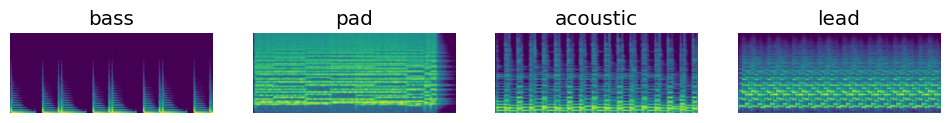

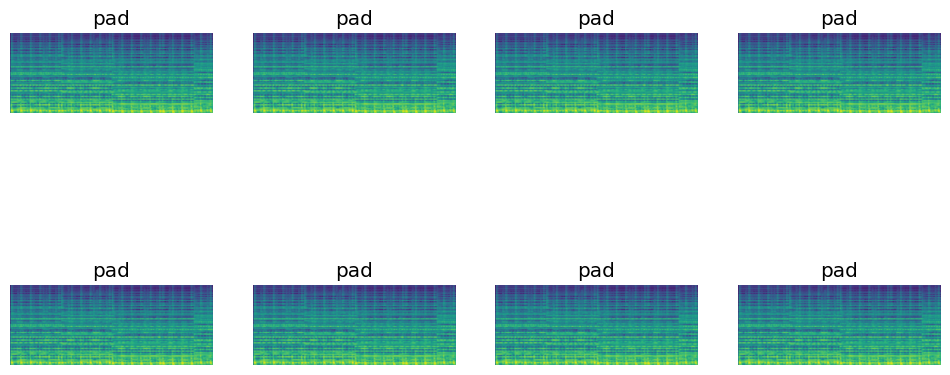

In [4]:
audio = DataBlock (
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
)

path = './spectrogramData'

# audio = audio.new(
#     item_tfms=Resize(256),
#     batch_tfms=aug_transforms())
dls = audio.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)
dls.train.show_batch(max_n=8, nrows=2, unique=True)
# dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [5]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
# learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,2.015925,1.090989,0.478571,02:16


epoch,train_loss,valid_loss,error_rate,time
0,0.784224,0.618315,0.214286,04:25
1,0.586891,0.412292,0.128571,04:16
2,0.436926,0.386224,0.157143,04:16
3,0.329607,0.266673,0.114286,04:18
4,0.268919,0.306653,0.107143,04:13
5,0.216325,0.361032,0.107143,04:20
6,0.174807,0.351392,0.100000,05:31
7,0.145604,0.334326,0.100000,04:47
8,0.123223,0.333859,0.107143,04:43
9,0.105084,0.336721,0.100000,04:23


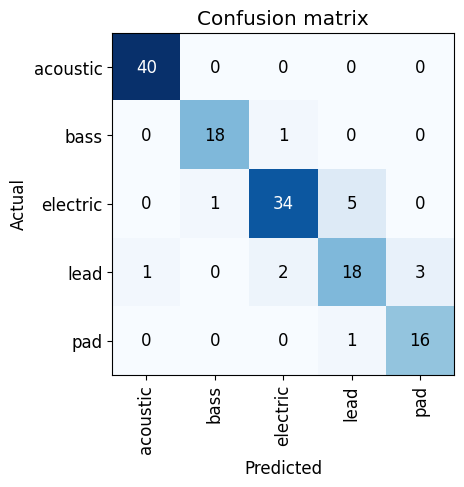

In [6]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

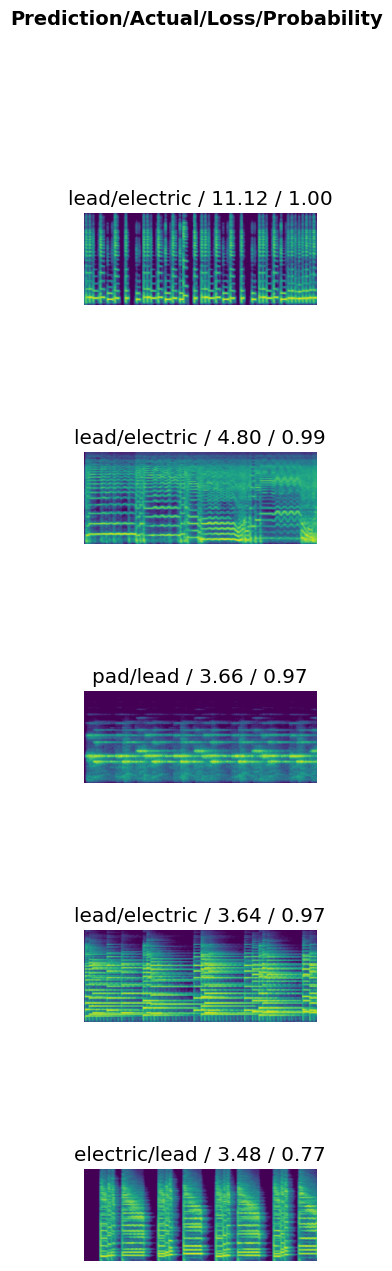

In [7]:
interp.plot_top_losses(5 ,nrows=5)

In [8]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [9]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [3]:
learn.export()

NameError: name 'learn' is not defined

In [2]:
learn_inf = load_learner('export.pkl')

NameError: name 'load_learner' is not defined

In [1]:
learn_inf.predict(r'.r\spectrogramData\lead\Boogie Right Gliding Lead.png')

NameError: name 'learn_inf' is not defined

In [7]:
audio = DataBlock (
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
)

path = './spectrogramData'

audio = audio.new(
    item_tfms=Resize(256),
    batch_tfms=aug_transforms())
dls = audio.dataloaders(path)
learn = vision_learner(dls, resnet18, metrics=error_rate)

In [8]:
learn_inf = load_learner('export.pkl')

In [16]:
learn_inf.predict(r'.\spectrogramData\bass\Manhattan Lowest Point Bass 02.png')

('bass',
 tensor(1),
 tensor([2.2370e-05, 9.9863e-01, 6.7226e-07, 1.0706e-03, 2.7627e-04]))